In [1]:
#import all the tools

# regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


In [2]:
df=pd.read_csv("train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [4]:
df["label"].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
df.shape

(18285, 5)

In [9]:
df.describe()

,id,label
count,18285.000000,18285.000000
mean,10409.807383,0.433361
std,5998.216236,0.495553
min,0.000000,0.000000
25%,5217.000000,0.000000
50%,10422.000000,0.000000
75%,15603.000000,1.000000
max,20799.000000,1.000000


In [10]:
pd.api.types.is_string_dtype(df["author"])

True

In [11]:
# find the columns which contain strings

for labels, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(labels)

title
author
text


In [12]:
# this will turn all of the string into category values
for labels, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[labels]= content.astype("category").cat.as_ordered()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      18285 non-null  int64   
 1   title   18285 non-null  category
 2   author  18285 non-null  category
 3   text    18285 non-null  category
 4   label   18285 non-null  int64   
dtypes: category(3), int64(2)
memory usage: 2.0 MB


In [14]:
df.isnull().sum()/len(df)

id        0.0
title     0.0
author    0.0
text      0.0
label     0.0
dtype: float64

In [15]:
# check for columns whcih area't numeric
for labels, content in df.items():
    if  not pd.api.types.is_numeric_dtype(content):
        print(labels)

title
author
text


In [16]:
for labels, content in df.items():
    if  not pd.api.types.is_numeric_dtype(content):
    
        # turn categories into numbers and add +1
        df[labels] =pd.Categorical(content).codes+1

In [17]:
pd.Categorical(df["author"]).codes

array([ 887,  858,  783, ..., 2448,  131,  934], dtype=int16)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      18285 non-null  int64
 1   title   18285 non-null  int16
 2   author  18285 non-null  int16
 3   text    18285 non-null  int16
 4   label   18285 non-null  int64
dtypes: int16(3), int64(2)
memory usage: 535.7 KB


In [19]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [20]:
df.head().T

,0,1,2,3,4
id,0,1,2,3,4
title,7003,5381,17018,120,7846
author,888,859,784,1656,1397
text,7110,5594,17004,15470,11579
label,1,0,1,1,1


In [21]:
X=df.drop("label",axis=1)
y=df["label"]

In [22]:
X

,id,title,author,text
0,0,7003,888,7110
1,1,5381,859,5594
2,2,17018,784,17004
3,3,120,1656,15470
4,4,7846,1397,11579
...,...,...,...,...
20795,20795,11781,1644,11920
20796,20796,9894,479,16857
20797,20797,9153,2449,13792
20798,20798,9937,132,9432


In [23]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

In [24]:
# split data into train, test sets
np.random.seed(42)


# split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
X_train

,id,title,author,text
6354,6354,16246,1508,7916
15151,15151,10311,2611,13532
5755,5755,8914,63,2487
16898,16898,6513,530,8564
628,628,14596,1713,16921
...,...,...,...,...
12819,12819,17099,1047,11604
13605,13605,10790,3483,10181
6151,6151,12662,188,3091
989,989,11434,2520,16300


In [26]:
y_train

6354     0
15151    0
5755     0
16898    0
628      0
        ..
12819    1
13605    1
6151     0
989      0
17966    1
Name: label, Length: 14628, dtype: int64

In [27]:
# puts models in a dictionary
models ={"Logistic Regression":LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    fits and evaluates given ML models.
    models : a dict of different Scikit-learn ML models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # set random seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores = {}
    # loop through models
    for name,model in models.items():
        # fit the model to the data
        model.fit(X_train,y_train)
        # evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores    

In [28]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test= y_test)
model_scores

{'Logistic Regression': 0.6010391030899644,
 'KNN': 0.6494394312277824,
 'Random Forest': 0.9075745146294777}

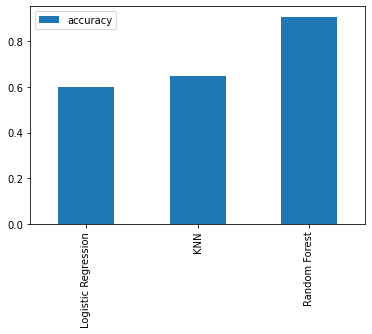

In [29]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

In [30]:
# LET TUNE KNN
train_scores=[]
test_scores =[]

# create a list of diff. values for n_neighbours
neighbors = range(1,21)

# setup KNN isntance
knn = KNeighborsClassifier()

# LOOP THROUGH DIFF. n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algo.
    knn.fit(X_train,y_train)
    
    # update the traiing scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # update the test scores list
    test_scores.append(knn.score(X_test,y_test))
    

In [31]:
train_scores

[1.0,
 0.8123461853978671,
 0.8156275635767022,
 0.7629887886245557,
 0.7675006836204539,
 0.7400191413727099,
 0.7415914684167351,
 0.7290812141099262,
 0.7305851791085589,
 0.7209461307082308,
 0.7197839759365601,
 0.7128110473065354,
 0.7136997538966365,
 0.7046076018594476,
 0.7048810500410172,
 0.6972928630024611,
 0.6991386382280558,
 0.6934645884604868,
 0.6963357943669675,
 0.6907301066447908]

In [32]:
test_scores

[0.6363139185124419,
 0.6434235712332513,
 0.6426032266885425,
 0.6510801203171999,
 0.6494394312277824,
 0.649712879409352,
 0.6576428766748701,
 0.6519004648619087,
 0.654361498496035,
 0.646978397593656,
 0.6480721903199343,
 0.6436970194148209,
 0.6453377085042384,
 0.6502597757724912,
 0.6475252939567951,
 0.6426032266885425,
 0.6450642603226688,
 0.6447908121410992,
 0.6447908121410992,
 0.6431501230516817]

Maximum KNN score on the test data: 65.76%


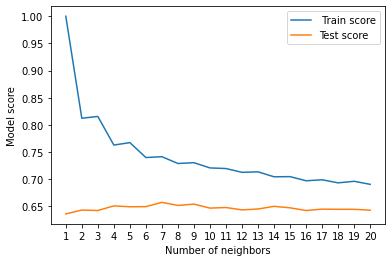

In [33]:
plt.plot(neighbors,train_scores,label=" Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [34]:
# create hyperpara grid for logicticregression
log_reg_grid ={"C": np.logspace(-4,4,20),
               "solver":["liblinear"]}
# create hyerpara grid for randomforestclassifer
rf_grid={"n_estimators": np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [35]:
# tune logisticregresssion
np.random.seed(42)

# setup random hyperparameter search for logicticsregression
rs_log_reg =RandomizedSearchCV(estimator=LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose= True)
#fit random hyperpara. search model for logic.rege.
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [37]:
rs_log_reg.score(X_test,y_test)

0.6010391030899644

In [38]:
# DIFFE. HYPER. FOR OUR LOGISTICREGRESSION MODEL
log_reg_grid ={"C": np.logspace(-4,4,30),
               "solver":["liblinear"]}
# create hyerpara grid for logisticrege.
gs_log_reg= GridSearchCV(LogisticRegression(),
                        param_grid =log_reg_grid,
                        cv=5,
                        verbose=True)

#fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [39]:
gs_log_reg.best_params_/

{'C': 0.0001, 'solver': 'liblinear'}

In [40]:
gs_log_reg.score(X_test,y_test)

0.6010391030899644

In [41]:
model_scores

{'Logistic Regression': 0.6010391030899644,
 'KNN': 0.6494394312277824,
 'Random Forest': 0.9075745146294777}

In [43]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
import joblib

In [45]:
joblib.dump(rf, 'fakenews.joblib')

['fakenews.joblib']